<a href="https://colab.research.google.com/github/Kisaua/fastai-colab-learning/blob/main/05_pets_breeds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

test colab jupyter notebook

In [1]:
!pip install -Uqq fastbook
import fastbook
# fastbook.setup_book()

In [2]:
from fastbook import *

In [13]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [14]:
Path.BASE_PATH=path 
path.ls()


(#2) [Path('annotations'),Path('images')]

In [15]:
(path/'images').ls()


(#7393) [Path('images/boxer_27.jpg'),Path('images/keeshond_47.jpg'),Path('images/chihuahua_135.jpg'),Path('images/boxer_200.jpg'),Path('images/english_cocker_spaniel_120.jpg'),Path('images/boxer_64.jpg'),Path('images/keeshond_187.jpg'),Path('images/Abyssinian_67.jpg'),Path('images/american_pit_bull_terrier_188.jpg'),Path('images/staffordshire_bull_terrier_5.jpg')...]

In [16]:
fname= (path/'images').ls()[1]

In [17]:
fname

Path('images/keeshond_47.jpg')

In [18]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['keeshond']

In [9]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


TensorCategory([0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')

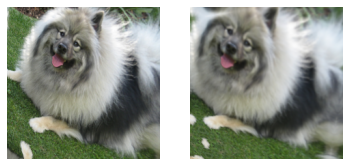

In [10]:
dblock1 = DataBlock(blocks=(ImageBlock(), CategoryBlock()),
                 
                   get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                   item_tfms=Resize(460))
# Place an image in the 'images/grizzly.jpg' subfolder where this notebook is located before running this
dls1 = dblock1.dataloaders([(path/'images').ls()[1]]*100, bs=8)
dls1.train.get_idxs = lambda: Inf.ones
x,y = dls1.valid.one_batch()
_,axs = subplots(1, 2)

x1 = TensorImage(x.clone())
x1 = x1.affine_coord(sz=224)
x1 = x1.rotate(draw=30, p=1.)
x1 = x1.zoom(draw=1.2, p=1.)
x1 = x1.warp(draw_x=-0.2, draw_y=0.2, p=1.)

tfms = setup_aug_tfms([Rotate(draw=30, p=1, size=224), Zoom(draw=1.2, p=1., size=224),
                       Warp(draw_x=-0.2, draw_y=0.2, p=1., size=224)])
x = Pipeline(tfms)(x)
#x.affine_coord(coord_tfm=coord_tfm, sz=size, mode=mode, pad_mode=pad_mode)
TensorImage(x[0]).show(ctx=axs[0])
TensorImage(x1[0]).show(ctx=axs[1]);
y

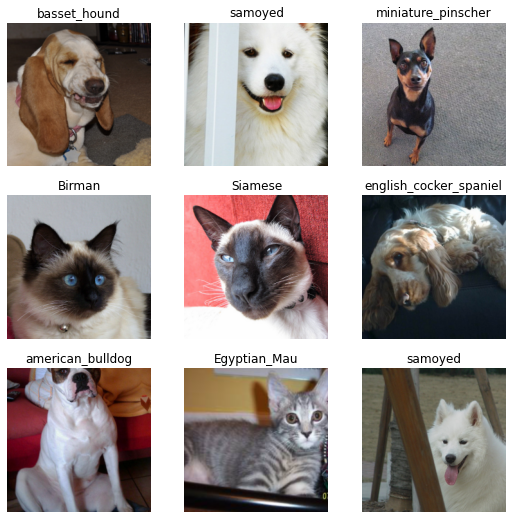

In [11]:
dls.show_batch(nrows=3, ncols=3)

In [12]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,1.499139,0.330042,0.105548,01:54


epoch,train_loss,valid_loss,error_rate,time
0,0.497613,0.327152,0.091340,02:27
1,0.336677,0.258271,0.073072,02:29


In [21]:
x,y = dls.one_batch()

In [22]:
y

TensorCategory([23,  6, 12, 35, 22,  9, 31, 32, 30,  8, 21, 21, 26, 28,  9, 16, 19,  5, 30, 18, 12, 10,  5, 19, 14, 17, 26, 18,  2,  3,  3,  2, 19, 27, 20, 17, 31,  7, 35, 14,  5, 32,  7, 15,  2, 11, 31,  4,
        28,  0, 19, 26,  5, 33, 10, 15, 21,  4, 35, 27, 28, 27, 35, 24], device='cuda:0')

In [23]:
preds,_ = learn.get_preds(dl=[(x,y)])
preds[0]

tensor([2.8484e-10, 9.7766e-10, 4.1997e-09, 1.7572e-08, 1.1227e-09, 8.3745e-09, 7.3288e-09, 6.3002e-07, 1.7834e-07, 7.9869e-11, 8.2327e-10, 3.5824e-09, 4.8681e-09, 1.3705e-11, 4.3637e-10, 2.2445e-10,
        3.4598e-09, 2.2332e-09, 1.1448e-10, 5.0061e-09, 1.2244e-09, 2.0913e-10, 8.1749e-09, 1.0000e+00, 6.3588e-10, 3.5599e-11, 1.7044e-09, 1.3151e-10, 4.4076e-09, 7.7270e-08, 3.7124e-09, 2.9150e-10,
        4.1357e-10, 1.4770e-10, 1.5714e-10, 2.0480e-10, 2.4927e-09])

In [24]:
loss_func = nn.CrossEntropyLoss()

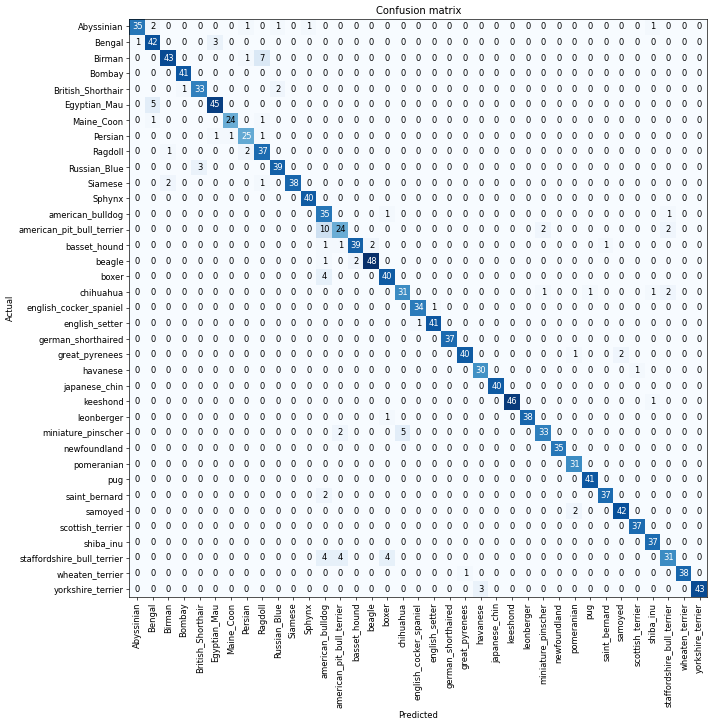

In [25]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [28]:
interp.most_confused(min_val=3)

[('american_pit_bull_terrier', 'american_bulldog', 10),
 ('Birman', 'Ragdoll', 7),
 ('Egyptian_Mau', 'Bengal', 5),
 ('miniature_pinscher', 'chihuahua', 5),
 ('boxer', 'american_bulldog', 4),
 ('staffordshire_bull_terrier', 'american_bulldog', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('staffordshire_bull_terrier', 'boxer', 4),
 ('Bengal', 'Egyptian_Mau', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('yorkshire_terrier', 'havanese', 3)]

In [29]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1, base_lr=0.1)

epoch,train_loss,valid_loss,error_rate,time
0,2.568605,4.778867,0.486468,01:57


epoch,train_loss,valid_loss,error_rate,time
0,3.349396,1.729679,0.537212,02:30


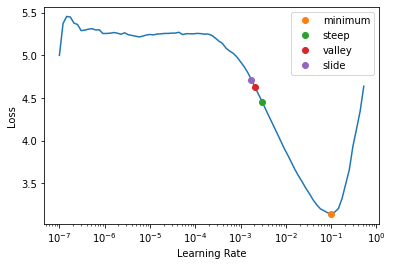

In [31]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

In [32]:
print(lrs)

SuggestedLRs(minimum=0.010000000149011612, steep=0.0030199517495930195, valley=0.0020892962347716093, slide=0.001737800776027143)


In [33]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.295108,0.370589,0.118403,01:58


epoch,train_loss,valid_loss,error_rate,time
0,0.532650,0.363895,0.106225,02:30
1,0.329037,0.254084,0.075101,02:30


In [34]:
learn.fine_tune??

In [35]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.173207,0.299141,0.104871,01:58
1,0.539642,0.237846,0.071719,01:58
2,0.334087,0.229116,0.070365,01:59


In [36]:
learn.unfreeze()

SuggestedLRs(valley=6.30957365501672e-05)

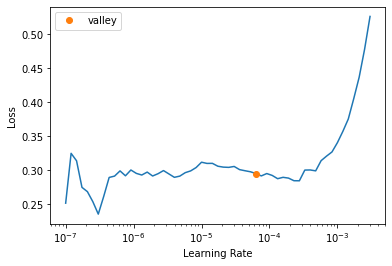

In [37]:
learn.lr_find()

In [38]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.256284,0.217950,0.062923,02:30
1,0.242881,0.214168,0.063599,02:30
2,0.224792,0.211160,0.062246,02:29
3,0.199225,0.210908,0.061570,02:29
4,0.192223,0.205209,0.060217,02:29
5,0.180033,0.206978,0.060217,02:30


In [39]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.180707,0.337323,0.107578,01:57
1,0.538799,0.255201,0.077131,01:57
2,0.320391,0.202962,0.060893,01:58


epoch,train_loss,valid_loss,error_rate,time
0,0.257651,0.201302,0.059540,02:29
1,0.249820,0.196308,0.055480,02:30
2,0.229188,0.196595,0.057510,02:30
3,0.218996,0.192526,0.057510,02:30
4,0.197880,0.193168,0.051421,02:31
5,0.175019,0.191784,0.053451,02:30
6,0.154499,0.184835,0.053451,02:30
7,0.148896,0.183286,0.050068,02:30
8,0.124759,0.190511,0.052774,02:30
9,0.140054,0.187056,0.050744,02:30


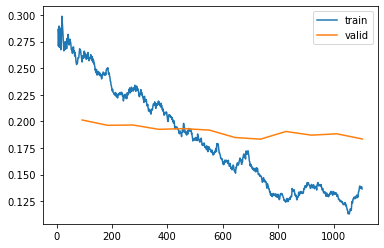

In [40]:
learn.recorder.plot_loss()